In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

from astropy import units as u
from astropy.coordinates import SkyCoord, Galactic, EarthLocation, AltAz
import astropy.coordinates as coord
from astropy.table import QTable
from astropy.time import Time

In [2]:
c = SkyCoord(ra=15.9932 * u.deg, dec=-10.52351344 * u.deg)
print(c.ra.hourangle)
print(c.to_string("hmsdms"))
print(c.dec.to_string(sep=":", precision=5))

1.0662133333333335
01h03m58.368s -10d31m24.648384s
-10:31:24.64838


In [3]:
c.represent_as("cartesian")

<CartesianRepresentation (x, y, z) [dimensionless]
    (0.94512547, 0.27088898, -0.18263903)>

In [4]:
c.represent_as(coord.CartesianRepresentation)

<CartesianRepresentation (x, y, z) [dimensionless]
    (0.94512547, 0.27088898, -0.18263903)>

In [5]:
print(
    [x for x in dir(coord) if x.endswith("Representation") and not x.startswith("Base")]
)

['CartesianRepresentation', 'CylindricalRepresentation', 'GRS80GeodeticRepresentation', 'PhysicsSphericalRepresentation', 'RadialRepresentation', 'SphericalRepresentation', 'UnitSphericalRepresentation', 'WGS72GeodeticRepresentation', 'WGS84GeodeticRepresentation']


In [11]:
c2 = SkyCoord(ra=15.9932 * u.deg, dec=-10.52351344 * u.deg, distance=127.4 * u.pc)
c2.represent_as("cartesian")

<CartesianRepresentation (x, y, z) in pc
    (120.40898448, 34.5112558, -23.2682118)>

In [12]:
c2.represent_as("cylindrical")

<CylindricalRepresentation (rho, phi, z) in (pc, rad, pc)
    (125.2571368, 0.279134, -23.2682118)>

In [13]:
c3 = SkyCoord(ra=15.9932 * u.deg, dec=-10.52351344 * u.deg, distance=127.4 * u.pc)
print(c3.representation_type)
c3

<class 'astropy.coordinates.representation.spherical.SphericalRepresentation'>


<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (15.9932, -10.52351344, 127.4)>

In [14]:
c3.representation_type = coord.CylindricalRepresentation
c3

<SkyCoord (ICRS): (rho, phi, z) in (pc, deg, pc)
    (125.2571368, 15.9932, -23.2682118)>

In [17]:
tbl = QTable.read("Cantat-Gaudin-open-clusters.ecsv")

open_cluster_c = SkyCoord(
    ra=tbl["ra"], dec=tbl["dec"], distance=tbl["distance"], frame="icrs"
)
len(open_cluster_c)

474

In [18]:
open_cluster_c[:4]

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [( 51.87 , 34.981,  629.6), (288.399, 36.369,  382.2),
     (295.548, 27.366,  522.9), (298.306, 39.349, 1034.6)]>

In [19]:
def coordinates_aitoff_plot(coords):
    fig, ax = plt.subplots(figsize=(10, 4), subplot_kw=dict(projection="aitoff"))

    sph = coords.spherical
    cs = ax.scatter(
        -sph.lon.wrap_at(180 * u.deg).radian, sph.lat.radian, c=sph.distance.value
    )

    def fmt_func(x, pos):
        val = coord.Angle(-x * u.radian).wrap_at(360 * u.deg).degree
        return f"${val:.0f}" + r"^{\circ}$"

    ticker = mpl.ticker.FuncFormatter(fmt_func)
    ax.xaxis.set_major_formatter(ticker)

    ax.grid()

    cb = fig.colorbar(cs)
    cb.set_label("distance [pc]")

    return fig, ax

Text(0, 0.5, 'Dec [deg]')

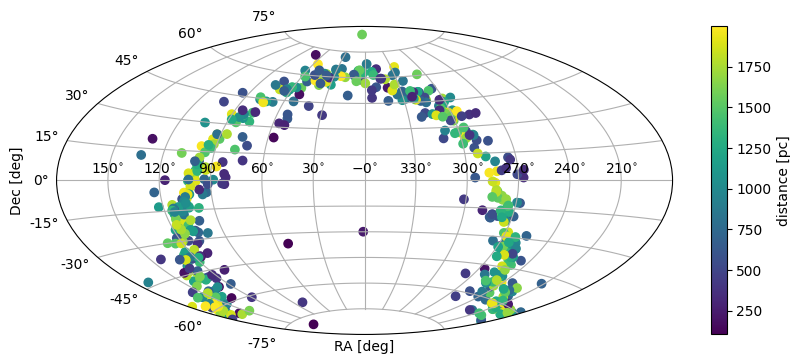

In [20]:
fig, ax = coordinates_aitoff_plot(open_cluster_c)
ax.set_xlabel("RA [deg]")
ax.set_ylabel("Dec [deg]")

In [22]:
open_cluster_gal = open_cluster_c.transform_to(Galactic())
open_cluster_gal[:4]

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, pc)
    [(155.72353157, -17.76999215,  629.59997559),
     ( 68.02807936,  11.60790067,  382.20001221),
     ( 62.82445527,   2.06275608,  522.90002441),
     ( 74.37841053,   6.07393592, 1034.59997559)]>

In [23]:
open_cluster_gal.l[:3]

<Longitude [155.72353157,  68.02807936,  62.82445527] deg>

In [24]:
open_cluster_gal.b[:3]

<Latitude [-17.76999215,  11.60790067,   2.06275608] deg>

Text(0, 0.5, 'Galactic latitude, $b$ [deg]')

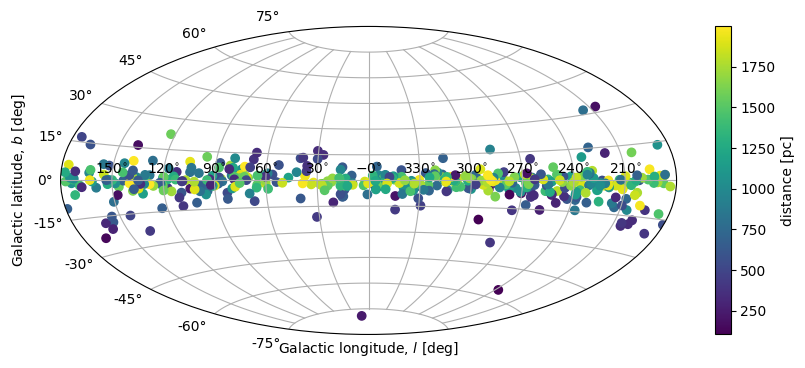

In [25]:
fig, ax = coordinates_aitoff_plot(open_cluster_gal)
ax.set_xlabel("Galactic longitude, $l$ [deg]")
ax.set_ylabel("Galactic latitude, $b$ [deg]")

In [27]:
# demo_loc = EarthLocation.from_geodetic(lon=-74.32834 * u.deg, lat=43.05885 * u.deg)
# demo_loc = EarthLocation.of_address("162 Fifth Ave, New York, NY 10010")
observing_location = EarthLocation.of_site("Kitt Peak")

In [28]:
# 1AM UTC = 6PM local time (AZ mountain time), roughly the start of a night
observing_date = Time("2020-12-18 1:00")

# Compute the alt/az over a 14 hour period, starting at 6PM local time,
# with 256 equally spaced time points:
time_grid = observing_date + np.linspace(0, 14, 256) * u.hour

In [29]:
altaz = AltAz(location=observing_location, obstime=time_grid)
oc_altaz = open_cluster_c[0].transform_to(altaz)
oc_altaz

<SkyCoord (AltAz: obstime=['2020-12-18 01:00:00.000' '2020-12-18 01:03:17.647'
 '2020-12-18 01:06:35.294' '2020-12-18 01:09:52.941'
 '2020-12-18 01:13:10.588' '2020-12-18 01:16:28.235'
 '2020-12-18 01:19:45.882' '2020-12-18 01:23:03.529'
 '2020-12-18 01:26:21.176' '2020-12-18 01:29:38.824'
 '2020-12-18 01:32:56.471' '2020-12-18 01:36:14.118'
 '2020-12-18 01:39:31.765' '2020-12-18 01:42:49.412'
 '2020-12-18 01:46:07.059' '2020-12-18 01:49:24.706'
 '2020-12-18 01:52:42.353' '2020-12-18 01:56:00.000'
 '2020-12-18 01:59:17.647' '2020-12-18 02:02:35.294'
 '2020-12-18 02:05:52.941' '2020-12-18 02:09:10.588'
 '2020-12-18 02:12:28.235' '2020-12-18 02:15:45.882'
 '2020-12-18 02:19:03.529' '2020-12-18 02:22:21.176'
 '2020-12-18 02:25:38.824' '2020-12-18 02:28:56.471'
 '2020-12-18 02:32:14.118' '2020-12-18 02:35:31.765'
 '2020-12-18 02:38:49.412' '2020-12-18 02:42:07.059'
 '2020-12-18 02:45:24.706' '2020-12-18 02:48:42.353'
 '2020-12-18 02:52:00.000' '2020-12-18 02:55:17.647'
 '2020-12-18 02:58:3

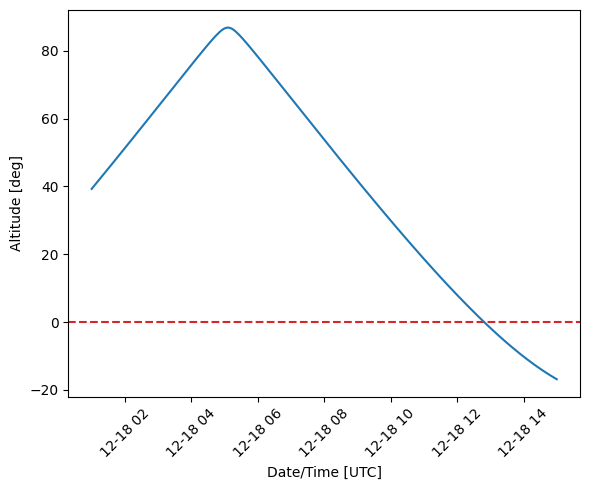

In [30]:
plt.figure(figsize=(6, 5))
plt.plot(time_grid.datetime, oc_altaz.alt.degree, marker="")
plt.axhline(0, zorder=-10, linestyle="--", color="tab:red")
plt.xlabel("Date/Time [UTC]")
plt.ylabel("Altitude [deg]")
plt.setp(plt.gca().xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()

In [31]:
len(open_cluster_c), len(altaz.obstime)

(474, 256)

In [32]:
open_cluster_altaz = open_cluster_c[:, np.newaxis].transform_to(altaz[np.newaxis])

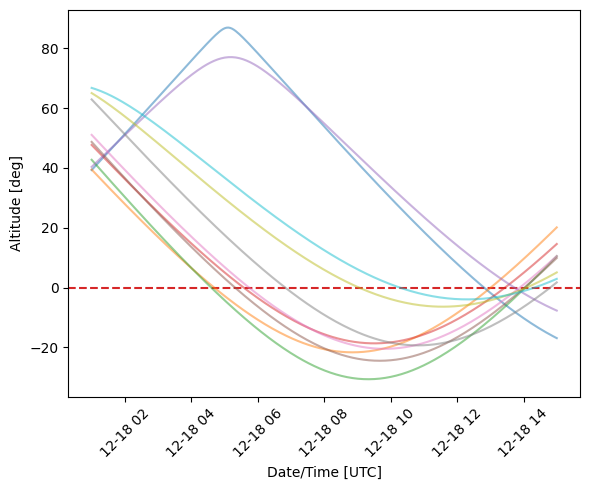

In [33]:
plt.figure(figsize=(6, 5))
plt.plot(time_grid.datetime, open_cluster_altaz[:10].alt.degree.T, marker="", alpha=0.5)
plt.axhline(0, zorder=-10, linestyle="--", color="tab:red")
plt.xlabel("Date/Time [UTC]")
plt.ylabel("Altitude [deg]")
plt.setp(plt.gca().xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()

In [34]:
icrs_c = coord.SkyCoord(150.4 * u.deg, -11 * u.deg)
icrs_c.transform_to(coord.FK5())

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (150.40000705, -11.00000493)>

In [35]:
# This cell will raise an exception and will not work (we will see a `ConvertError` exception) - this is expected!

icrs_c.transform_to(coord.Galactocentric())

ConvertError: Transforming to/from a Galactocentric frame requires a 3D coordinate, e.g. (angle, angle, distance) or (x, y, z).

**Exercises**

Przybylski’s star or HD101065 is in the southern constellation of Centaurus with a right ascension of 174.4040348 degrees and a declination of -46.70953633 degrees. Create a SkyCoord object of its sky position.

If the distance to Przybylski’s star is 108.4 pc, retrieve a 3D Cartesian representation. (Hint: we did this earlier in the tutorial and it may help to create a new 3D SkyCoord object.)

Imagine it is May 2018, and you would like to take an observation of HD 101065 from Greenwich Royal Observatory. Use astropy.coordinates to figure out if you can observe the star that month (hint: use the EarthLocation class). You can use any time and date of that month for your timeframe.